In [ ]:
! gdown https://drive.google.com/u/0/uc?id=17WpSslT1bv81vHy3k1u0lo53_S10evDe

Downloading...
From: https://drive.google.com/u/0/uc?id=17WpSslT1bv81vHy3k1u0lo53_S10evDe
To: /content/CXR_Covid-19_Challenge.zip
3.61GB [00:39, 40.6MB/s]


In [ ]:
! unzip -qq CXR_Covid-19_Challenge.zip

replace train/covid/covid-0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# ! gdown https://drive.google.com/u/2/uc?id=1cpqqgbb77-1vt5-SvmQWV2Klla_tuLjD

Downloading...
From: https://drive.google.com/u/2/uc?id=1cpqqgbb77-1vt5-SvmQWV2Klla_tuLjD
To: /content/CXR_Covid-19_10e_Vgg16.h5
178MB [00:02, 79.5MB/s]


In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt

###########################
EPOCHS = 10
MODEL_NAME = 'VGG_16'
IMG_SIZE = '360x360'
OUTPUT_LAYERS = '128-32-3'
###########################

In [ ]:
all_covid_files = glob.glob('/content/train/covid/*')
all_normal_files = glob.glob('/content/train/normal/*')
all_pneumo_files = glob.glob('/content/train/pneumonia/*')
print(len(all_covid_files)," ",len(all_normal_files)," ",len(all_pneumo_files)," ")

6534   7151   4273  


In [ ]:
# plot it in histogram


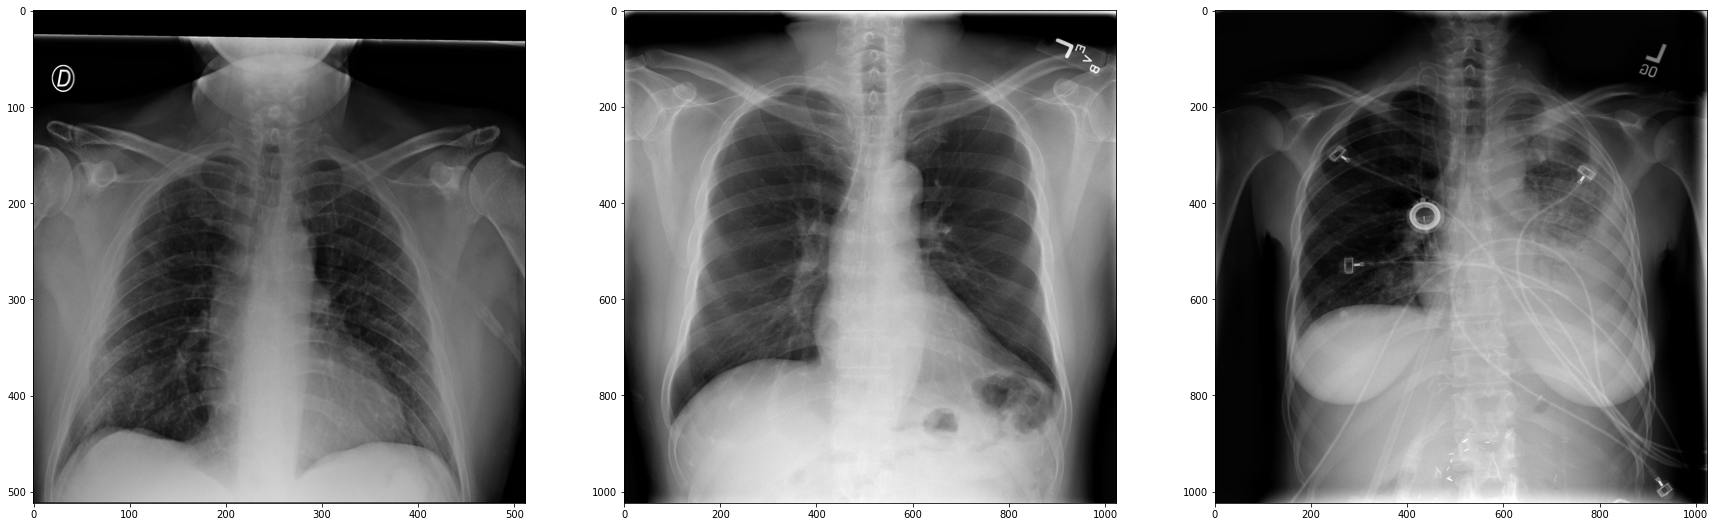

In [ ]:

plt.figure(figsize=(30,10))
img_covid = cv2.imread(all_covid_files[0])
plt.subplot(1,3,1)
plt.imshow(img_covid)
img_normal = cv2.imread(all_normal_files[0])
plt.subplot(1,3,2)
plt.imshow(img_normal)
img_pneumo = cv2.imread(all_pneumo_files[0])
plt.subplot(1,3,3)
plt.imshow(img_pneumo)
plt.show()

In [ ]:
print(img_pneumo.shape)
print(img_covid.shape)
print(img_normal.shape)

(1024, 1024, 3)
(512, 512, 3)
(1024, 1024, 3)


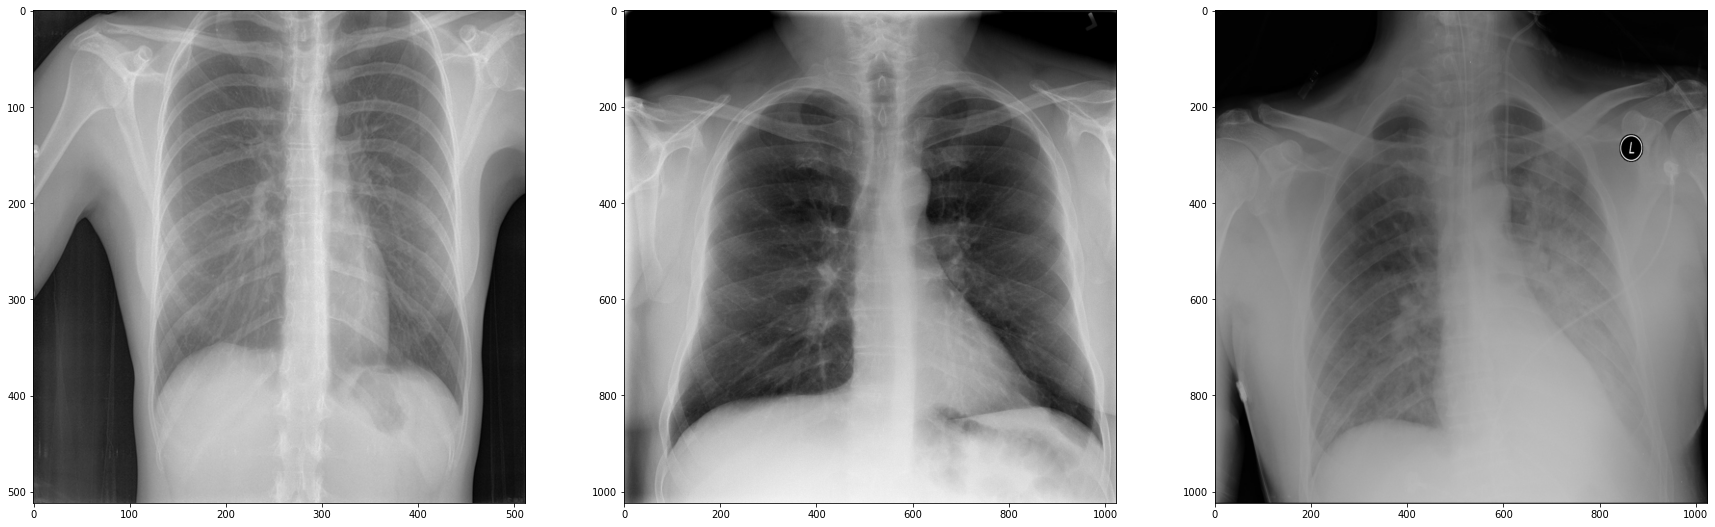

In [ ]:

plt.figure(figsize=(30,10))
img_covid = cv2.imread(all_covid_files[1])
plt.subplot(1,3,1)
plt.imshow(img_covid)
img_normal = cv2.imread(all_normal_files[1])
plt.subplot(1,3,2)
plt.imshow(img_normal)
img_pneumo = cv2.imread(all_pneumo_files[1])
plt.subplot(1,3,3)
plt.imshow(img_pneumo)
plt.show()

In [ ]:


from tensorflow.keras.utils import to_categorical
from PIL import Image

import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os
from tensorflow.keras.utils import to_categorical
from PIL import Image

import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D,\
                                    GlobalMaxPool2D, Dropout, SpatialDropout2D, add, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC, Precision, Recall, SensitivityAtSpecificity, PrecisionAtRecall, \
                                     TruePositives, TrueNegatives, FalsePositives, FalseNegatives


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os



In [ ]:

dir = glob.glob('train/*')
get_freq = {}
# count = 1
for item in dir:
  freq = len(glob.glob("{}/*".format(item)))
  print(freq)
  item_name  = item.split('/')[1]
  get_freq[item_name] = freq
  #get_freq[count] = freq
  #count += 1
  #get_freq.append(freq)


6534
4273
7151


In [ ]:

short_index = {}
total_img_names = []
short_labels = []
for item in dir:
  print(item)
  img_names = glob.glob("{}/*".format(item))[:5]
  print("img names = ",img_names[:10])
  short_name = str(img_names[0].split('.')[0]).split('/')[2].split('_')[0]
  short_index[short_name] = img_names[0].split('/')[1]
  short_labels.append(short_name)
  total_img_names.append(img_names)
print(total_img_names)
print(len(total_img_names))
print(short_labels)
print(short_index)

train/covid
img names =  ['train/covid/covid-0004056.jpg', 'train/covid/covid-000881.jpg', 'train/covid/covid-0002474.jpg', 'train/covid/covid-0002355.jpg', 'train/covid/covid-0002026.jpg']
train/pneumonia
img names =  ['train/pneumonia/pneumonia0003800.jpg', 'train/pneumonia/pneumonia0003091.jpg', 'train/pneumonia/pneumonia0003713.jpg', 'train/pneumonia/pneumonia000552.jpg', 'train/pneumonia/pneumonia0002815.jpg']
train/normal
img names =  ['train/normal/normal-0005508.jpg', 'train/normal/normal-0002929.jpg', 'train/normal/normal-0002687.jpg', 'train/normal/normal-0004147.jpg', 'train/normal/normal-0004873.jpg']
[['train/covid/covid-0004056.jpg', 'train/covid/covid-000881.jpg', 'train/covid/covid-0002474.jpg', 'train/covid/covid-0002355.jpg', 'train/covid/covid-0002026.jpg'], ['train/pneumonia/pneumonia0003800.jpg', 'train/pneumonia/pneumonia0003091.jpg', 'train/pneumonia/pneumonia0003713.jpg', 'train/pneumonia/pneumonia000552.jpg', 'train/pneumonia/pneumonia0002815.jpg'], ['train/nor

In [ ]:
short_rev_index = {}
for item in short_index:
  short_rev_index[short_index[item]] = item
print(short_rev_index)

index = {}
rev_index = {}
count = 0
for item in get_freq:
  index[item] = count
  rev_index[count] = item
  count += 1 
print(index)
print(rev_index)

{'covid': 'covid-0004056', 'pneumonia': 'pneumonia0003800', 'normal': 'normal-0005508'}
{'covid': 0, 'pneumonia': 1, 'normal': 2}
{0: 'covid', 1: 'pneumonia', 2: 'normal'}


In [ ]:
def parse_filepath(filepath):
    try:
        #path, filename = os.path.split(filepath)
        label = filepath.split('/')[1]
        #filename, ext = os.path.splitext(filename)
        #label, _ = filename.split("_")
        return label
    except Exception as e:
        print('error to parse %s. %s' % (filepath, e))
        return None, None

In [ ]:
np.random.seed(42)

H, W, C = 360, 360, 3
N_LABELS = len(index)
D = 1

files_train = glob.glob("train/*/*.*")
print("Total files train = ",len(files_train))


# create a pandas data frame of images, age, gender and race
attributes = list(map(parse_filepath, files_train))

df_train = pd.DataFrame(attributes)
df_train['file'] = files_train
df_train.columns = ['label', 'file']
df_train = df_train.dropna()
df_train.tail()


p = np.random.permutation(len(df_train))
train_idx = p[:len(df_train)]


Total files train =  17958


In [ ]:
# for item in files_train:
#     if item.split('.')[-1] not in 'jpg' and item.split('.')[-1] not in 'png':
#         print(item)
#     # print(item.split('.')[-1])
#     # break

In [ ]:

##################################
H, W, C = 360, 360, 3
N_LABELS = len(index)
D = 1
##################################

files_validation = glob.glob("validation/*/*.*")
print("Total files valid = ",len(files_validation))

# create a pandas data frame of images, age, gender and race
attributes = list(map(parse_filepath, files_validation))

df_val = pd.DataFrame(attributes)
df_val['file'] = files_validation
df_val.columns = ['label', 'file']
df_val = df_val.dropna()
df_val.tail()

print(len(df_val))
p = np.random.permutation(len(df_val))
test_idx = p[:len(df_val)]



Total files valid =  3432
3432


In [ ]:
print('train count: %s,  test count: %s' % (
    len(train_idx),  len(test_idx)))


train count: 17958,  test count: 3432


In [ ]:
# for item in files_validation:
#     if item.split('.')[-1] not in 'jpg' and item.split('.')[-1] not in 'png':
#         print(item)
#     # print(item.split('.')[-1])
#     # break

In [ ]:

from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Flatten, GlobalAveragePooling2D


# Change the pretrained model name according to the given criteria

frozen = VGG16 (weights="imagenet", input_shape=(360,360,3), include_top=False)
frozen.summary()

trainable = frozen.output
trainable = GlobalAveragePooling2D()(trainable)
#print(trainable.shape)
trainable = Dense(128, activation="relu")(trainable)
trainable = Dense(32, activation="relu")(trainable)
trainable = Dense(N_LABELS, activation="softmax")(trainable)
model = Model(inputs=frozen.input, outputs=trainable)
model.summary()

# model.layers
# for layer in model.layers[:-4]:
#     layer.trainable = False
# for layer in model.layers:
#     print(layer, layer.trainable)

# TODO
# Add different Dense layers, like 1024-512-3 or 1024-1024-3 etc
# Add dropouts and check how it is performing
# Add a different learning rate to check how it is performing
# Add different batch size to check how it is performing
# Add different sizes of images to check how it performs


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 360, 360, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 360, 360, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 360, 360, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 180, 180, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 180, 180, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 180, 180, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 90, 90, 128)       0     

In [ ]:
# https://stackoverflow.com/questions/55640149/error-in-keras-when-i-want-to-calculate-the-sensitivity-and-specificity
# add specificity and sensitivity here
# https://datascience.stackexchange.com/questions/33587/keras-custom-loss-function-as-true-negatives-by-true-negatives-plus-false-posit/40746#40746
# add some loss functions here

# Metrics
# https://www.sabinasz.net/unbalanced-classes-machine-learning/

from keras import backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())



opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy',
            #experimental_run_tf_function=False,
            metrics = ['accuracy', sensitivity, specificity]
            )



In [ ]:
# tf.keras.utils.plot_model(model, to_file='Model1.png')
# from IPython.display import Image
# Image(retina=True, filename='Model1.png')

In [ ]:
# data generator function needs to be changed, i.e., preprocessing should be done first
# to avoid bottlenecks.

from tensorflow.keras.utils import to_categorical
from PIL import Image

def get_data_generator(df, indices, for_training, batch_size=16):
    images, labels = [], []
    while True:
        # print("indices = ",indices)    
        # print("len indices = ",len(indices))
        for i in indices:
            r = df.iloc[i]
            # print(" r = ", r, " i = ",i)
            file, label = r['file'], r['label']
            # print("file, label = ",file, label)
            im_gray = Image.open(file).convert('L')
            # print("Shape = ",im_gray.shape)
            im_gray = im_gray.resize((360,360))
            im = np.zeros(shape=(360,360,3))
            
            im[:,:,0] = im_gray
            im[:,:,1] = im_gray
            im[:,:,2] = im_gray
            im = np.array(im) / 255.0

            # print(im.shape)
            images.append(im)
            # print(np.asarray([to_categorical(index[label], N_LABELS)]))
            # print(np.asarray([to_categorical(index[label], N_LABELS)]).shape)
            
            labels.append(to_categorical(index[label], N_LABELS))
            if len(images) >= batch_size:
                yield np.array(images), np.array(labels)
                images, labels = [], []
        # if not for_training:
        #     break


from tensorflow.keras.utils import to_categorical
from PIL import Image

def get_data_generator_custom(df, indices, for_training, batch_size=16):
    labels = []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, label = r['file'], r['label']
            labels.append(to_categorical(index[label], N_LABELS))
            if len(images) >= batch_size:
                yield  np.array(labels)
                labels = []


In [ ]:


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
# batch_size = 100
# valid_batch_size = 32
batch_size = 32
valid_batch_size = 32
train_gen = get_data_generator(df_train, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df_val, test_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss'),
    #ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4)
]

# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=5,
                    callbacks=[tensorboard_callback,callbacks],
                    validation_data=valid_gen,
                    validation_steps=len(test_idx)//valid_batch_size)

Epoch 1/5
561/561 [==============================] - 1317s 2s/step - loss: 0.4566 - accuracy: 0.8156 - sensitivity: 0.7675 - specificity: 0.9389 - val_loss: 0.2597 - val_accuracy: 0.9036 - val_sensitivity: 0.8995 - val_specificity: 0.9553
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 2/5
377/561 [===================>..........] - ETA: 6:44 - loss: 0.2449 - accuracy: 0.9119 - sensitivity: 0.9079 - specificity: 0.9581

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
hist_df = pd.DataFrame(history.history) 
hist_json_file = 'history_CXR_Covid-19_{}e_{}_{}_{}.json'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS)
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)


NameError: ignored

In [ ]:
import json
import matplotlib.pyplot as plt
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:

with open('history_CXR_Covid-19_{}e_{}_{}_{}.json'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'r') as f:
    VGG_16 = json.load(f)
print (len(VGG_16))

4


In [ ]:
for item in VGG_16:
    print(item)

loss
accuracy
val_loss
val_accuracy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


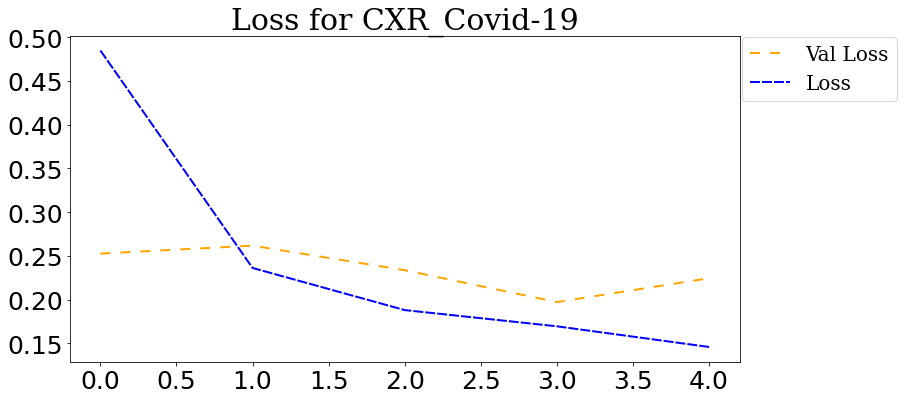

In [ ]:
loss_vgg16 = []
for item in VGG_16['loss']:
    loss_vgg16.append(VGG_16['loss'][item])


val_loss_vgg16 = []
for item in VGG_16['val_loss']:
    val_loss_vgg16.append(VGG_16['val_loss'][item])



accuracy_vgg16 = []
for item in VGG_16['accuracy']:
    accuracy_vgg16.append(VGG_16['accuracy'][item])


val_accuracy_vgg16 = []
for item in VGG_16['val_accuracy']:
    val_accuracy_vgg16.append(VGG_16['val_accuracy'][item])



plt.figure(figsize=(12,6))
plt.title('Loss for CXR_Covid-19', fontsize=30, fontname = 'DejaVu Serif', fontweight = 500)
plt.plot(val_loss_vgg16, color='orange', linestyle='-.', dashes=(5, 5), linewidth=2.0)
plt.plot(loss_vgg16, color='blue',  linestyle='--', dashes=(5, 1),  linewidth=2.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

lgd = plt.legend(['Val Loss','Loss',], 
           loc="lower right", prop={'family':'DejaVu Serif', 'size':20}, bbox_to_anchor=(1.25, 0.77))
plt.savefig('CXR_Covid-19_losses_{}e_{}_{}_{}.eps'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('CXR_Covid-19_losses_{}e_{}_{}_{}.json'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), bbox_extra_artists=(lgd,), bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


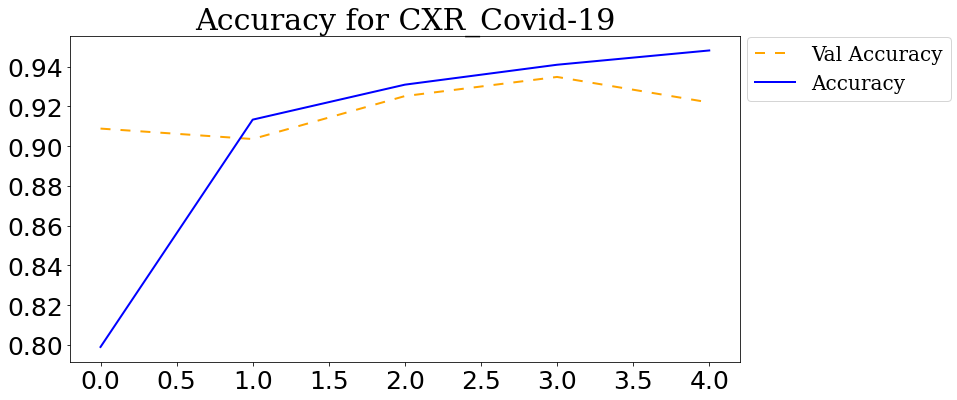

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Accuracy for CXR_Covid-19', fontsize=30, fontname = 'DejaVu Serif', fontweight = 500)
plt.plot(val_accuracy_vgg16, color='orange', linestyle='-.', dashes=(5, 5), linewidth=2.0)
plt.plot(accuracy_vgg16, color='blue',   linewidth=2.0)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

lgd = plt.legend(['Val Accuracy','Accuracy',], 
           loc="lower right", prop={'family':'DejaVu Serif', 'size':20}, bbox_to_anchor=(1.33, 0.77))
plt.savefig('CXR_Covid-19_acc_{}e_{}_{}_{}.eps'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('CXR_Covid-19_acc_{}e_{}_{}_{}.json'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
# download the model in computer for later use
model.save('CXR_Covid-19_{}e_{}_{}_{}.h5'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS))

In [ ]:

from tensorflow import keras
model = keras.models.load_model('CXR_Covid-19_{}e_{}_{}_{}.h5'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS))

OSError: ignored

In [ ]:
# test_gen = get_data_generator(df_val, test_idx, for_training=False)
# dict(zip(model.metrics_names, model.evaluate(test_gen, steps=len(test_idx))))

 143/3432 [>.............................] - ETA: 20:29 - loss: 10.0194 - accuracy: 0.0162

KeyboardInterrupt: ignored

In [ ]:

from tensorflow.keras.utils import to_categorical
from PIL import Image
from tqdm import tqdm
y_pred_list = []
y_test_list = []

for i in tqdm(test_idx):
    r = df_val.iloc[i]
    file_, label = r['file'], r['label']

    im_gray = Image.open(file_).convert('L')
    # print("Shape = ",im_gray.shape)
    im_gray = im_gray.resize((360,360))
    im = np.zeros(shape=(360,360,3))

    im[:,:,0] = im_gray
    im[:,:,1] = im_gray
    im[:,:,2] = im_gray
    im = np.array(im) / 255.0


    # im = Image.open(file_)
    # im = im.resize((360, 360))
    # im = np.array(im) / 255.0
    # print(im[np.newaxis, ...].shape)
    y_pred = model.predict(im[np.newaxis, ...])
    y_pred_list.append(int(tf.math.argmax(y_pred, axis=-1)))
    #print(index[label])
    y_test_list.append(index[label])
    # print("This = ",rev_index[int(tf.math.argmax(y_pred, axis=-1))])
    # print(to_categorical(index[label], N_LABELS))
    # print(label)
    

100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


In [ ]:
import pickle

with open('y_test_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'wb') as f:
    pickle.dump(y_test_list, f)
with open('y_pred_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'wb') as f:
    pickle.dump(y_pred_list, f)


In [ ]:
with open('y_test_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'rb') as f:
    y_test_list = pickle.load(f)
with open('y_pred_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'rb') as f:
    y_pred_list = pickle.load(f)
# y_test_list, y_pred_list

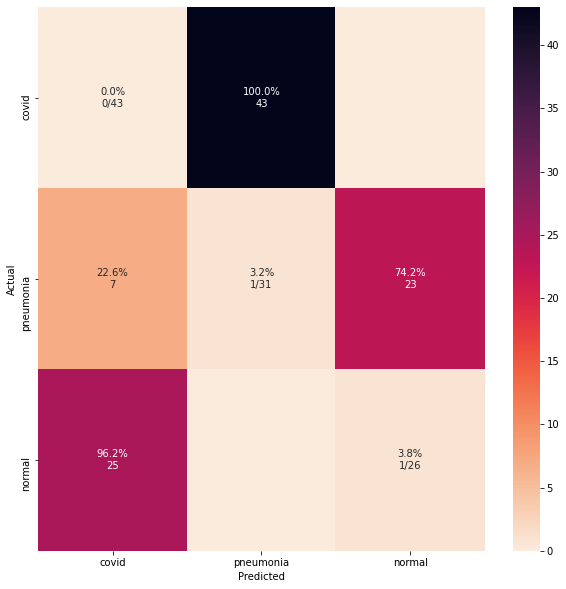

In [ ]:


from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test_list, y_pred_list)
report = classification_report(y_test_list, y_pred_list)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=[rev_index[i] for i in rev_index], columns=[rev_index[i] for i in rev_index])
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='rocket_r')
    #plt.savefig(filename)
    plt.savefig('confusion_matrix_CXR_Covid-19_{}e_{}_{}_{}.png'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS))
    plt.savefig('confusion_matrix_CXR_Covid-19_{}e_{}_{}_{}.eps'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS))
    #plt.show()

cm_analysis(y_test_list, y_pred_list, [i for i in rev_index] , ymap=None, figsize=(10,10))

In [ ]:
[i for i in rev_index]
[rev_index[i] for i in rev_index]

['covid', 'pneumonia', 'normal']

In [ ]:
with open('report_CXR_Covid-19_{}e_{}_{}_{}.txt'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(report)
    #sys.stdout = original_stdout # Reset the standard output to its original value



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mv /content/CXR_Covid-19_10e_Vgg16.h5 /content/drive/MyDrive/BraTS21/